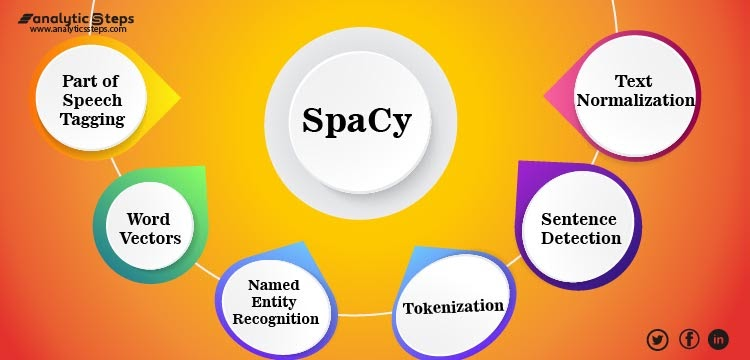

!pip install -U spacy

!pip install -U spacy-lookups-data

!python -m spacy download en_core_web_sm

In [1]:
import spacy

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
doc = nlp('Apple is looking to buy a startup in U.K. for $1 billion')
print(doc)

Apple is looking to buy a startup in U.K. for $1 billion


### Parts of Speech Tagging

In [4]:
for token in doc:
    print(f'{token.text:{15}} {token.lemma_:{15}} {token.pos_:{15}} {token.is_stop}')

Apple           Apple           PROPN           False
is              be              AUX             True
looking         look            VERB            False
to              to              PART            True
buy             buy             VERB            False
a               a               DET             True
startup         startup         NOUN            False
in              in              ADP             True
U.K.            U.K.            PROPN           False
for             for             ADP             True
$               $               SYM             False
1               1               NUM             False
billion         billion         NUM             False


### Dependency

In [5]:
for chunk in doc.noun_chunks:
    print(f'{chunk.text:{15}} {chunk.root.text:{15}} {chunk.root.dep_}')

Apple           Apple           nsubj
a startup       startup         dobj
U.K.            U.K.            pobj


### Named Entity Recognition

In [6]:
for ent in doc.ents:
    print(f'{ent.text:{15}} {ent.label_}')

Apple           ORG
U.K.            GPE
$1 billion      MONEY


### Sentence Segementation

In [7]:
#doc.sents
doc1 = nlp("welcome to my notes. artificial intelligence and nlp with python")

In [8]:
for sent in doc1.sents:
    print(sent)

welcome to my notes.
artificial intelligence and nlp with python


In [24]:
from spacy.language import Language

@Language.component("set_rule")
def set_rule(doc):
    for token in doc[:-1]:
        if token.text == '...':
            doc[token.i + 1].is_sent_start == True
    return doc

In [26]:
nlp.remove_pipe("set_rule")
nlp.add_pipe("set_rule",before='parser')

<function __main__.set_rule(doc)>

In [27]:
doc1 = nlp("welcome to my notes...Thanks...artificial intelligence and nlp with python!")

In [28]:
for sent in doc1.sents:
    print(sent)

welcome to my notes...
Thanks...artificial intelligence and nlp with python!


### Dependency Graph

In [13]:
from spacy import displacy

In [14]:
doc

Apple is looking to buy a startup in U.K. for $1 billion

In [15]:
displacy.render(doc, style='dep')

In [16]:
displacy.render(doc, style='dep', options={'compact':True, 'distance':70 })

In [17]:
displacy.render(doc, style='ent')